In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

# Display numpy numbers with two decimal places
np.set_printoptions(precision=2)

# Display pandas numbers with two decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [138]:
file_path = "../data/smrt_manuf_projects_two_digit_activity.csv"

In [139]:
df = pd.read_csv(file_path)

In [140]:
df.head()

,project_code,size,status,region,investment_budget,public_funding,nace_2_digits_code,nace_2_digits_description,sector_code,sector_description
0,p_1,Small,Existing,Ionian Islands,0.48,0.26,11,Manufacture of beverages,C,Manufacturing
1,p_2,Medium,Existing,Attica,0.73,0.26,25,"Manufacture of fabricated metal products, exce...",C,Manufacturing
2,p_2,Medium,Existing,Attica,0.73,0.26,25,"Manufacture of fabricated metal products, exce...",C,Manufacturing
3,p_2,Medium,Existing,Attica,0.73,0.26,28,Manufacture of machinery and equipment n.e.c.,C,Manufacturing
4,p_3,Micro,Existing,Central Macedonia,0.36,0.25,31,Manufacture of furniture,C,Manufacturing


In [141]:
# Convert nace_2_digits_code_code as string
df["nace_2_digits_code"] = df["nace_2_digits_code"].astype(str)

## Projects for funding summary
There are 151 projects that have been approved for funding.


The investments are in 351 two-digit activities because many investment projects span across multiple activities.

Bugeet and funding are in € millions.



In [142]:
# number of rows is number of sectors to invest
len(df)

351

## 1. Report totals of Approved proposals

The data have been saved in a format that preserves at a two digit level all the economic activities that projects will invest in.

This allows for a detailed examination of the total number of investments to sector, because many porjects invest in more than one two digits sector.

But, there are no available data on how an investment project budget is divided among different economomic activities.

Note that, summing by all the columns in the data will result in adding the budget of each project as many times as the distinct sectors a project will invest in.

To avoid double counting, first aggregate the data by project.




### 1.1. Aggregate data by investment project

In [143]:
# Group by 'project_code' and aggregate
# Select the columns to keep
columns_to_keep = [
    "size", "status", "region",
    "investment_budget", "public_funding"
]

# Group by 'project_code' and keep the first occurrence of each group
df_aggregated = df.groupby("project_code")[columns_to_keep].first().reset_index()

In [144]:
len(df_aggregated)

151


### 1.2 Totals without any grouping

In [145]:
df_totals = df_aggregated.agg({
    'project_code': 'count',
    'investment_budget': 'sum',
    'public_funding': 'sum'
}).to_frame()

# Rename the row 'project_code' to 'projects' and the column '0' to 'total'
df_totals.rename(index={'project_code': 'projects'}, columns={0: 'total'}, inplace=True)

df_totals

,total
projects,151.00
investment_budget,184.92
public_funding,102.49


In [146]:
# Use pandas Styler to save df_totals as an HTML file
styled_df = df_totals.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]}]
)

# Save the styled DataFrame to an HTML file
styled_df.to_html("df_totals.html")

print("DataFrame saved as 'df_totals.html'")

DataFrame saved as 'df_totals.html'


### 1.2 Analysis by size

In [147]:
# count number of proposals per size
df_aggregated['size'].value_counts()

size
Small     86
Micro     40
Medium    25
Name: count, dtype: int64

In [148]:
df_aggregated.groupby(df_aggregated["size"])[["investment_budget", "public_funding"]].sum()

,investment_budget,public_funding
size,,
Medium,60.14,27.80
Micro,26.17,15.90
Small,98.60,58.79


In [149]:
df_aggregated.region.value_counts()

region
Central Macedonia               65
Attica                          23
Central Greece                  10
Western Greece                   9
Western Macedonia                8
Thessaly                         8
Eastern Macedonia and Thrace     7
Epirus                           6
Crete                            6
Peloponnese                      4
Ionian Islands                   2
South Aegean                     2
North Aegean                     1
Name: count, dtype: int64

In [150]:
# count number of proposals per size, prefectoral unit
df.groupby(["size", "region"])["nace_2_digits_code"].count()

size    region                      
Medium  Attica                           7
        Central Greece                   2
        Central Macedonia               25
        Crete                            3
        Epirus                           1
        Peloponnese                      2
        Thessaly                        11
        Western Macedonia                3
Micro   Attica                          11
        Central Greece                   9
        Central Macedonia               36
        Crete                            3
        Eastern Macedonia and Thrace     5
        Epirus                           5
        Ionian Islands                  16
        North Aegean                     1
        Thessaly                        19
        Western Greece                   8
        Western Macedonia                2
Small   Attica                          29
        Central Greece                  21
        Central Macedonia               83
        Crete    

In [151]:
df.groupby(["size", "region"]).value_counts()

size    region             project_code  status    investment_budget  public_funding  nace_2_digits_code  nace_2_digits_description                                                 sector_code  sector_description                                      
Medium  Attica             p_2           Existing  0.73               0.26            25                  Manufacture of fabricated metal products, except machinery and equipment  C            Manufacturing                                               2
                           p_39          Existing  6.00               1.80            38                  Waste collection, treatment and disposal activities; materials recovery   E            Water supply, sewerage, waste management and remediation    2
                           p_77          Existing  1.17               0.41            31                  Manufacture of furniture                                                  C            Manufacturing                                  

In [155]:
categorical_cols = [
    "size",
    "status",
    "region",
    "nace_2_digits_code",
    "nace_2_digits_description",
    "sector_code",
    "sector_description",
]

demographic_cols = ["size", "status", "region"]

sectoral_cols = [
    "nace_2_digits_code",
    "nace_2_digits_description",
    "sector_code",
    "sector_description",
]

numerical_cols = ["investment_budget", "public_funding"]

In [156]:
for col in categorical_cols:
    print(df[col].value_counts())
    # assign to a new df based on column name
    # globals()[f"{col}_df"] = df[col].value_counts().reset_index()

size
Small     182
Micro     115
Medium     54
Name: count, dtype: int64
status
Existing    337
New          14
Name: count, dtype: int64
region
Central Macedonia               144
Attica                           47
Thessaly                         38
Central Greece                   32
Western Greece                   21
Ionian Islands                   17
Western Macedonia                13
Crete                            12
Epirus                           10
Eastern Macedonia and Thrace      9
Peloponnese                       4
South Aegean                      3
North Aegean                      1
Name: count, dtype: int64
nace_2_digits_code
25    50
10    39
38    38
28    35
23    31
18    23
22    20
31    16
27    12
26    11
11    11
33    11
20     9
17     9
52     7
14     6
13     6
16     4
24     4
71     3
32     2
21     2
29     1
82     1
Name: count, dtype: int64
nace_2_digits_description
Manufacture of fabricated metal products, except machinery and equipment  

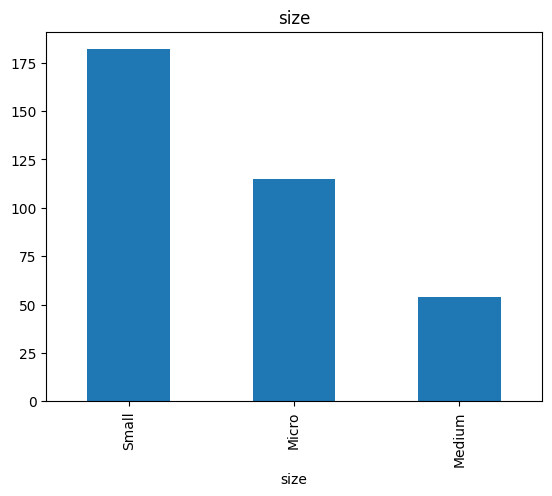

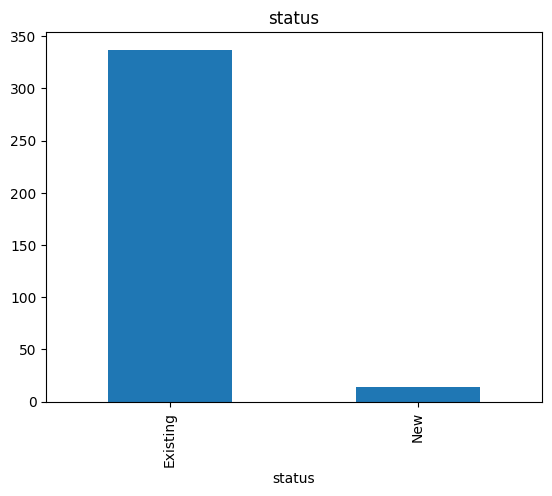

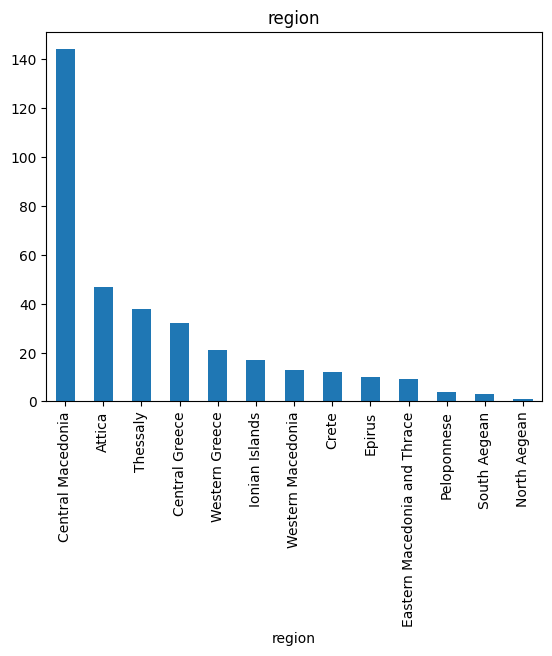

In [157]:
for col in demographic_cols:
    plotted = df[col].value_counts().plot(kind="bar", title=col)
    plt.show()

In [158]:
for col in sectoral_cols:
    print(df[col].value_counts())

nace_2_digits_code
25    50
10    39
38    38
28    35
23    31
18    23
22    20
31    16
27    12
26    11
11    11
33    11
20     9
17     9
52     7
14     6
13     6
16     4
24     4
71     3
32     2
21     2
29     1
82     1
Name: count, dtype: int64
nace_2_digits_description
Manufacture of fabricated metal products, except machinery and equipment                                                           50
Manufacture of food products                                                                                                       39
Waste collection, treatment and disposal activities; materials recovery                                                            38
Manufacture of machinery and equipment n.e.c.                                                                                      35
Manufacture of other non-metallic mineral products                                                                                 31
Printing and reproduction of recorded media

In [159]:
# print sum of numerical columns with two decimal points
for col in numerical_cols:
    print(f"{col}: {df[col].sum()}" f"\n{col} mean: {df[col].mean()}")

investment_budget: 414.29947814
investment_budget mean: 1.1803403935612535
public_funding: 226.98815302999998
public_funding mean: 0.6466898946723646


In [160]:
### 3.6 Group by sector totals

In [161]:
totals_by_sector_df = (
    df.groupby(
        [
            "nace_2_digits_code",
            "nace_2_digits_description",
            "sector_code",
            "sector_description",
        ]
    )
    .agg(
        investment_budget=("investment_budget", "sum"),
        public_funding=("public_funding", "sum"),
        projects=("nace_2_digits_code", "count"),
    )
    .reset_index()
)

totals_by_sector_df

,nace_2_digits_code,nace_2_digits_description,sector_code,sector_description,investment_budget,public_funding,projects
0,10,Manufacture of food products,C,Manufacturing,53.32,33.14,39
1,11,Manufacture of beverages,C,Manufacturing,10.31,5.90,11
2,13,Manufacture of textiles,C,Manufacturing,4.00,2.49,6
3,14,Manufacture of wearing apparel,C,Manufacturing,2.77,1.82,6
4,16,Manufacture of wood and of products of wood an...,C,Manufacturing,3.52,1.72,4
5,17,Manufacture of paper and paper products,C,Manufacturing,21.12,8.46,9
6,18,Printing and reproduction of recorded media,C,Manufacturing,14.76,7.71,23
7,20,Manufacture of chemicals and chemical products,C,Manufacturing,17.74,8.04,9
8,21,Manufacture of basic pharmaceutical products a...,C,Manufacturing,7.53,3.63,2
9,22,Manufacture of rubber and plastic products,C,Manufacturing,35.93,16.75,20


In [162]:
sector_11 = totals_by_sector_df[totals_by_sector_df["nace_2_digits_code"] == 11]
sector_11

,nace_2_digits_code,nace_2_digits_description,sector_code,sector_description,investment_budget,public_funding,projects


In [163]:
sector_11_projects = df[df["nace_2_digits_code"] == 11]
sector_11_projects

,project_code,size,status,region,investment_budget,public_funding,nace_2_digits_code,nace_2_digits_description,sector_code,sector_description


In [164]:
# Create the first plot (Total Number of Projects by Sector)
fig1 = px.bar(
    totals_by_sector_df,
    x="nace_2_digits_code",
    y="projects",
    title="Total Number of Projects by Two-Digit Activity Sectors",
    labels={"nace_2_digits_code": "Sector", "projects": "Number of Projects"},
)

fig1.show()

In [165]:
# Save the first plot as an HTML file
# fig1.write_html("../plots/total_number_of_projects_by_sector.html")

In [166]:
# Create the second plot (Total Budget of Projects by Sector)
fig2 = px.bar(
    totals_by_sector_df,
    x="nace_2_digits_code",
    y="investment_budget",
    title="Total Budget of Projects by Two-Digit Sectors",
    labels={"nace_2_digits_code": "Sector", "investment_budget": "Total Budget"},
)
fig2.show()

In [167]:

# Create the second plot (Total Budget of Projects by Sector)
fig2 = px.bar(
    totals_by_sector_df,
    x="sector_code",
    y="investment_budget",
    title="Total Budget of Sectors",
    labels={"sector_code": "Sector", "investment_budget": "Total Budget"},
)
fig2.show()

In [168]:
# Save the second plot as an HTML file
# fig2.write_html("../plots/total_budget_of_projects_by_sector.html")

In [169]:
# Todo: Create functions for translating to Greek, English, French, etc.
# Move this to dedicate file
# # Dictionary to translate column names to Greek
# column_names_gr = {
#     "project_code": "Κωδικός Πρότασης",
#     "size": "Μέγεθος",
#     "incorporation_status": "Κατάσταση Ενσωμάτωσης",
#     "region": "Περιφέρεια",
#     "investment_budget": "Προϋπολογισμός Επένδυσης",
#     "public_funding": "Δημόσια Χρηματοδότηση",
#     "nace_2_digits_code": "Διψήφιος Κωδικός Κλάδου",
#     "nace_2_digits_description": "Περιγραφή Κλάδου",
#     "sector": "Κλάδος",
# }